# Algoritmos de optimización - Reto 1

Nombre: <br> Miguel López Vélez <br>
Github: <br> Astolfo2332 <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [ ]:
# Torres de Hanoi
#Primero definimos el objeto torre de hanoi
def hanoi(n, origen, auxiliar, destino):
    if n == 1:
        print(f'Mover disco de {origen} a {destino}')
    else:
        hanoi(n-1, origen, destino, auxiliar)
        print(f'Mover disco de {origen} a {destino}')
        hanoi(n-1, auxiliar, origen, destino)



## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [1]:
import pytest
#Sucesión_de_Fibonacci
import sys
sys.setrecursionlimit(1000000)

def fibonacci_recursivo(n):
    if n <= 1:
        return n
    else:
        #Ya que el siguiente termino es nada más que la sumatoria de los dos anteriores a este
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

print(fibonacci_recursivo(40))


#Metodo iterativo
def fibonacci_iterativo(n):
    a = 0
    b = 1
    #Realizamos un for loop para ir sumando los valores de a y b en el rango de n
    for i in range(n):
        a, b = b, a + b
    return a

print(fibonacci_iterativo(10))

#Pruebas
def test_fibonacci():
    assert fibonacci_recursivo(10) == 55
    assert fibonacci_iterativo(10) == 55

102334155
55



Ahora gráficamos el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [2]:
import time
import matplotlib.pyplot as plt

def medir_tiempo(func,  n):
    tiempo_inicial = time.time()
    func(n)
    tiempo_final = time.time()
    return tiempo_final - tiempo_inicial

n_values = list(range(1, 40))

tiempos_recursivo = [medir_tiempo(fibonacci_recursivo, n) for n in n_values]
tiempos_iterativo = [medir_tiempo(fibonacci_iterativo, n) for n in n_values]


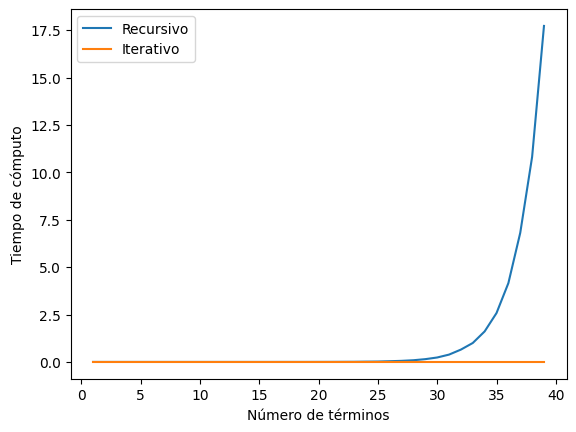

In [3]:
plt.plot(n_values, tiempos_recursivo, label='Recursivo')
plt.plot(n_values, tiempos_iterativo, label='Iterativo')
plt.xlabel('Número de términos')
plt.ylabel('Tiempo de cómputo')
plt.legend()
plt.show()




También podemos calcular la complejidad de ambos algoritmos.

In [2]:
import big_o

results_rec = big_o.big_o(fibonacci_recursivo, big_o.datagen.n_, n_repeats=10, min_n=1, max_n=40)
results_it = big_o.big_o(fibonacci_iterativo, big_o.datagen.n_, n_repeats=10, min_n=1, max_n=40)

In [5]:
print(results_rec[0])
print(results_it[0])

Exponential: time = 2.6E-06 * 1.6^n (sec)
Constant: time = 1.6E-05 (sec)


De esta manera podemos probar que el algoritmo recursivo tiene una complejidad exponencial O(2^n) mientras que el algoritmo iterativo tiene una complejidad lineal O(n).

Esto debido a la propía implementación de cada algoritmo al ser recursivo se va a llamar a sí mismo n veces, mientras que el iterativo solo se va a llamar n veces.

Siendo en este caso mejor solución y más eficiente el algoritmo iterativo. Más, sin embargo, es mejor usar la fórmula de [Binet](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci#Equation_5) para calcular la sucesión de Fibonacci.

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [6]:
# Problema del cambio de moneda
import pytest

def cambio_monedas(cantidad, monedas):
    #Ordenamos las monedas de mayor a menor
    #Ya que necesitamos conocer el valor descendente de monedas
    #Inicializamos uan lista vacía para guardar la solución
    solucion = [0 for _ in monedas]
    #Ordenamos las monedas de mayor a menor para poder hacer la división
    for i, valor in enumerate(sorted(monedas, reverse=True)):
        solucion[i] = cantidad // valor
        cantidad %= valor
    return solucion

print(cambio_monedas(200, [25, 10, 5, 1]))



#Pruebas
def test_cambio_monedas():
    assert cambio_monedas(123, [25, 10, 5, 1]) == [4, 2, 0, 3]
    assert cambio_monedas(123, [25, 10, 5, 1]) != [4, 2, 1, 3]

[8, 0, 0, 0]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [5]:
# Problema de las N-Reinas




